In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
  
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Data Collection

In [133]:
df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/Traffic.csv')[0:100]

In [134]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               100 non-null    object
 1   Date               100 non-null    int64 
 2   Day of the week    100 non-null    object
 3   CarCount           100 non-null    int64 
 4   BikeCount          100 non-null    int64 
 5   BusCount           100 non-null    int64 
 6   TruckCount         100 non-null    int64 
 7   Total              100 non-null    int64 
 8   Traffic Situation  100 non-null    object
dtypes: int64(6), object(3)
memory usage: 7.2+ KB


# Cleaning

## Feature conversion to numerical

In [136]:
# col Time
from datetime import datetime

df['Time'] = [pd.to_datetime(x, format='%I:%M:%S %p') for x in df['Time']]
df['Time'] = [x.timestamp() for x in df['Time']]

In [137]:
# col Day of the week
df = pd.get_dummies(df, columns=['Day of the week'], dtype=int)

# Model Selection

In [138]:
#%pip install pycaret

In [139]:
import pycaret as pc
from pycaret.classification import *

In [140]:
# loading data for preprocessing
classification_setup = pc.classification.setup(data = df, target  = 'Traffic Situation')

,Description,Value
0,Session id,7131
1,Target,Traffic Situation
2,Target type,Multiclass
3,Target mapping,"heavy: 0, high: 1, low: 2, normal: 3"
4,Original data shape,"(100, 10)"
5,Transformed data shape,"(100, 10)"
6,Transformed train set shape,"(70, 10)"
7,Transformed test set shape,"(30, 10)"
8,Numeric features,9
9,Preprocess,True


In [141]:
# Compare and evaluate different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8857,0.5690,0.8857,0.8429,0.8522,0.8130,0.8455,0.5020
catboost,CatBoost Classifier,0.8857,0.5798,0.8857,0.8786,0.8692,0.8162,0.8426,1.0190
lda,Linear Discriminant Analysis,0.8714,0.5833,0.8714,0.8762,0.8572,0.7954,0.8297,0.0460
nb,Naive Bayes,0.8571,0.5833,0.8571,0.8357,0.8327,0.7717,0.8020,0.0450
dt,Decision Tree Classifier,0.8571,0.5208,0.8571,0.8138,0.8251,0.7688,0.8025,0.0460
lightgbm,Light Gradient Boosting Machine,0.8571,0.5869,0.8571,0.8560,0.8335,0.7800,0.8149,0.0690
rf,Random Forest Classifier,0.8429,0.5768,0.8429,0.7900,0.7996,0.7469,0.7897,0.2850
ada,Ada Boost Classifier,0.8429,0.5565,0.8429,0.7750,0.7965,0.7534,0.7857,0.1730
et,Extra Trees Classifier,0.8429,0.5738,0.8429,0.8107,0.8123,0.7498,0.7830,0.2180
xgboost,Extreme Gradient Boosting,0.8429,0.5602,0.8429,0.8043,0.8043,0.7484,0.7905,0.1020


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [142]:
# print to view hyperparamaters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7131, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [143]:
# create a model post model comparison
model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.5882,0.6682
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.0000,0.7143,0.5238,0.6000,0.4167,0.5455
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.8571,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.7143,0.9405,0.7143,0.7143,0.7143,0.5882,0.5882
6,0.8571,1.0000,0.8571,0.8929,0.8435,0.7879,0.8141
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [144]:
# print hyperparamaters to compare to vanilla model
print(model)

In [145]:
# creating a tuned model
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.5882,0.6682
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,0.0000,0.8571,0.8857,0.8413,0.7308,0.7655
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.8571,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.7143,0.8810,0.7143,0.7143,0.7143,0.5882,0.5882
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [146]:
# print to view tuned hyperparamaters
print(tuned_model)

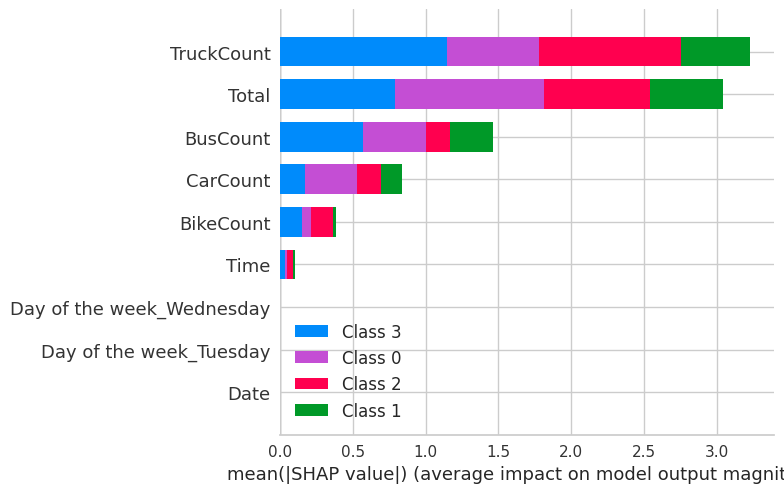

In [147]:
# SHAP values
interpret_model(tuned_model)#, plot = 'correlation', feature = 'CarCount', save = True)

In [148]:
final_model = finalize_model(tuned_model)
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [149]:
'''# Creating a bagged decision tree ensemble model
bagged_knn = ensemble_model(knn)
# Creating a boosted decision tree ensemble model
boosted_knn = ensemble_model(knn, method = 'Boosting')
# Blending estimators
blender = blend_models(estimator_list = [boosted_knn, 
                                         bagged_knn, 
                                         tuned_knn], method = 'soft')
# Stacking bagged, boosted, and tuned estimators
stacker = stack_models(estimator_list = [boosted_knn,
                                         bagged_knn,
                                         tuned_knn], meta_model=knn)'''

"# Creating a bagged decision tree ensemble model\nbagged_knn = ensemble_model(knn)\n# Creating a boosted decision tree ensemble model\nboosted_knn = ensemble_model(knn, method = 'Boosting')\n# Blending estimators\nblender = blend_models(estimator_list = [boosted_knn, \n                                         bagged_knn, \n                                         tuned_knn], method = 'soft')\n# Stacking bagged, boosted, and tuned estimators\nstacker = stack_models(estimator_list = [boosted_knn,\n                                         bagged_knn,\n                                         tuned_knn], meta_model=knn)"

In [150]:
top5 = compare_models(n_select=5,sort='Accuracy')
tuned_top5 = [tune_model(i, optimize='Accuracy') for i in top5]
#ensem_top5 = [ensemble_model(i, n_estimators = 10, optimize='Accuracy') for i in tuned_top5]
blend = blend_models(tuned_top5, optimize='Accuracy')
#blend_ensem = blend_models(ensem_top5, optimize='Accuracy')
super_model = automl(optimize='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8857,0.5690,0.8857,0.8429,0.8522,0.8130,0.8455,0.5010
catboost,CatBoost Classifier,0.8857,0.5798,0.8857,0.8786,0.8692,0.8162,0.8426,1.0350
lda,Linear Discriminant Analysis,0.8714,0.5833,0.8714,0.8762,0.8572,0.7954,0.8297,0.0420
nb,Naive Bayes,0.8571,0.5833,0.8571,0.8357,0.8327,0.7717,0.8020,0.0530
dt,Decision Tree Classifier,0.8571,0.5208,0.8571,0.8138,0.8251,0.7688,0.8025,0.0460
lightgbm,Light Gradient Boosting Machine,0.8571,0.5869,0.8571,0.8560,0.8335,0.7800,0.8149,0.0730
rf,Random Forest Classifier,0.8429,0.5768,0.8429,0.7900,0.7996,0.7469,0.7897,0.2710
ada,Ada Boost Classifier,0.8429,0.5565,0.8429,0.7750,0.7965,0.7534,0.7857,0.1710
et,Extra Trees Classifier,0.8429,0.5738,0.8429,0.8107,0.8123,0.7498,0.7830,0.2130
xgboost,Extreme Gradient Boosting,0.8429,0.5602,0.8429,0.8043,0.8043,0.7484,0.7905,0.1020


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.5882,0.6682
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.0000,0.7143,0.5238,0.6000,0.4167,0.5455
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.9643,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.8571,1.0000,0.8571,0.7500,0.7959,0.7812,0.8103
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8571,1.0000,0.8571,0.7500,0.7959,0.7812,0.8103
8,0.8571,0.9405,0.8571,0.9286,0.8667,0.8056,0.8289


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.5882,0.6682
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,0.0000,0.8571,0.8857,0.8413,0.7308,0.7655
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.8571,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.7143,0.8810,0.7143,0.7143,0.7143,0.5882,0.5882
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.6190,0.6571,0.4815,0.5015
1,0.8571,0.0000,0.8571,0.7429,0.7937,0.7200,0.7606
2,0.2857,0.0000,0.2857,0.2619,0.2585,-0.2069,-0.2315
3,0.7143,0.0000,0.7143,0.5238,0.6000,0.4167,0.5455
4,0.5714,0.7119,0.5714,0.3571,0.4286,0.3000,0.4456
5,0.2857,0.2952,0.2857,0.1714,0.2143,-0.0938,-0.1150
6,0.5714,0.6881,0.5714,0.3571,0.4286,0.3000,0.4456
7,0.5714,0.6881,0.5714,0.3571,0.4286,0.3000,0.4456
8,0.4286,0.6262,0.4286,0.2429,0.3095,0.1250,0.1534


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.5882,0.6682
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.0000,0.7143,0.5238,0.6000,0.4167,0.5455
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.9286,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.5714,0.9048,0.5714,0.5000,0.5306,0.3438,0.3565
6,0.8571,1.0000,0.8571,0.7500,0.7959,0.7812,0.8103
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,1.0000,0.8571,0.9286,0.8667,0.8056,0.8289


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,0.0000,0.8571,0.8857,0.8413,0.7308,0.7655
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.8750,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.7143,0.7917,0.7143,0.7143,0.7143,0.5882,0.5882
6,0.8571,1.0000,0.8571,0.7500,0.7959,0.7812,0.8103
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7143,0.9405,0.7143,0.7143,0.7143,0.5882,0.5882


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.5882,0.6682
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.0000,0.7143,0.5238,0.6000,0.4167,0.5455
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.9048,0.8571,0.7500,0.7959,0.7812,0.8103
5,0.7143,0.9405,0.7143,0.7143,0.7143,0.5882,0.5882
6,0.8571,1.0000,0.8571,0.7500,0.7959,0.7812,0.8103
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,1.0000,0.8571,0.9286,0.8667,0.8056,0.8289


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [151]:
#predict_model(super_model)

In [152]:
final_super_model = finalize_model(super_model)
evaluate_model(final_super_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [153]:
save_model(final_model, 'Traffic_situation')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'Date', 'CarCount',
                                              'BikeCount', 'BusCount',
                                              'TruckCount', 'Total',
                                              'Day of the week_Tuesday',
                                              'Day of the week_Wednesday'],
                                     transformer=SimpleImpu...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                

In [154]:
# Au besoin
model = load_model('Traffic_situation')

Transformation Pipeline and Model Successfully Loaded
